### 【BeautifulSoup 패키지】
- 뷰티플 수프는 HTML과 XML 문서를 파싱하기위한 파이썬 패키지입니다. 웹 스크래핑에 유용한 HTML에서 데이터를 추출하는 데 사용할 수있는 구문 분석 된 페이지에 대한 구문 분석 트리를 생성합니다.
- from bs4 import BeautifulSoup     로 모듈을 실행합니다.  모듈 에러시 모듈을 !pip install beautifulsoup4 로 설치합니다.
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/


In [ ]:
test_html = """<html> \
            <body> \
                <h1 id='title'>[1]크롤링이란?</h1> \
                <p class='cssstyle'>웹페이지에서 필요한 데이터를 추출하는 것</p> \
                <p id='body' align='center'>파이썬을 중심으로 다양한 웹크롤링 기술 발달</p> \
            </body> \
        </html>"
"""

In [ ]:
#########################
## 미션
## test_html을 bs4모듈에서 불러오고 print합니다..(파싱)
from bs4 import BeautifulSoup
soup = BeautifulSoup(test_html, "html.parser")
soup

<html> <body> <h1 id="title">[1]크롤링이란?</h1> <p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p> <p align="center" id="body">파이썬을 중심으로 다양한 웹크롤링 기술 발달</p> </body> </html>"

In [ ]:
#########################
## 미션
## 처음나오는 p 태그를 검색하고 그 태그의 텍스트를 표시합니다.

tagFind=soup.find('p')
re=tagFind.string
re

'웹페이지에서 필요한 데이터를 추출하는 것'

### 【html에서 추출한 데이터에서 형태소분석을 하였습니다.】

In [ ]:
#########################
## 미션
## <h1> , <P> 태그의 내용을 검색하는 for를 작성합니다.
## html_h1 과 html_p 변수에  각 내용을 저장합니다.
html_h1=0 ; html_p=0
datalist=['h1','p']

for i in datalist:
    tagFind=soup.find(i)  # 맨위에 나와 있는 첫번째 자료만 찾기
    re=tagFind.string
    if i=='h1':
        html_h1=re
    elif i=='p':
        html_p=re

print("html_h1 의 변수 내용은==>",html_h1)
print("html_p 의 변수 내용은==>",html_p)



html_h1 의 변수 내용은==> [1]크롤링이란?
html_p 의 변수 내용은==> 웹페이지에서 필요한 데이터를 추출하는 것


In [ ]:
!pip install konlpy

In [ ]:
#########################
## ## 저장된 html_h1과 html_P 태그를 형태소 분석을 실시하면 자동 list가 됩니다.
##
### okt의 명사단위로 나누세요

from konlpy.tag import Okt
okt=Okt()

print('\n--------- 형태소 분석 -----------')
print(okt.morphs(html_h1))
print(okt.morphs(html_p))

print('\n---------명사 -----------')
print(okt.nouns(html_h1))
print(okt.nouns(html_p))

print('\n--------품사 태깅 -----------')
print(okt.pos(html_h1))
print(okt.pos(html_p))

print('\n--------품사 태깅중 Noun만 추출합니다. -----------')
pos_=okt.pos(html_p) ; noun_=[]

for i in pos_:
    if i[1]=='Noun':
        noun_.append(i)
print(noun_)


print('\n\n--(참고: 1109일 토요일 자료) 위의 for 구문을 아래와 같이 한줄로 작성가능합니다. ---')

ttt=[i for i in pos_ if i[1]=='Noun']
print(ttt)


--------- 형태소 분석 -----------
['[', '1', ']', '크', '롤링', '이란', '?']
['웹페이지', '에서', '필요한', '데이터', '를', '추출', '하는', '것']

---------명사 -----------
['롤링']
['웹페이지', '데이터', '추출', '것']

--------품사 태깅 -----------
[('[', 'Punctuation'), ('1', 'Number'), (']', 'Punctuation'), ('크', 'Verb'), ('롤링', 'Noun'), ('이란', 'Josa'), ('?', 'Punctuation')]
[('웹페이지', 'Noun'), ('에서', 'Josa'), ('필요한', 'Adjective'), ('데이터', 'Noun'), ('를', 'Josa'), ('추출', 'Noun'), ('하는', 'Verb'), ('것', 'Noun')]

--------품사 태깅중 Noun만 추출합니다. -----------
[('웹페이지', 'Noun'), ('데이터', 'Noun'), ('추출', 'Noun'), ('것', 'Noun')]


--(참고: 1109일 토요일 자료) 위의 for 구문을 아래와 같이 한줄로 작성가능합니다. ---
[('웹페이지', 'Noun'), ('데이터', 'Noun'), ('추출', 'Noun'), ('것', 'Noun')]


In [ ]:
ttt

[('웹페이지', 'Noun'), ('데이터', 'Noun'), ('추출', 'Noun'), ('것', 'Noun')]

In [ ]:
import pandas as pd

word=[i[0] for i in pos_]
mor=[i[1] for i in pos_]

dict_data={'word':word,'품사':mor}
db=pd.DataFrame(dict_data)
db

,word,품사
0,웹페이지,Noun
1,에서,Josa
2,필요한,Adjective
3,데이터,Noun
4,를,Josa
5,추출,Noun
6,하는,Verb
7,것,Noun


In [ ]:
#########################
## 미션
## p 태그의 모든 텍스트를 출력합니다.
### 모든 텍스트를 갖고옴
### 태그를 제외하고 텍스트만 출력하는 명령어는 get_text
## get_text는 문자열만 출력가능, 리스트 통으로 출력 불가능
태그포함=soup.find_all('p')
print(태그포함,'\n\n')

for i in 태그포함:
    print(i.get_text())

#위의 구문을 한줄로 변형해보세요.
ttt=[i for i in pos_ if i[1]=='Noun']

[<p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p>, <p align="center" id="body">파이썬을 중심으로 다양한 웹크롤링 기술 발달</p>] 


웹페이지에서 필요한 데이터를 추출하는 것
파이썬을 중심으로 다양한 웹크롤링 기술 발달


In [ ]:
#########################
## 미션
## p 태그중  class='cssstyle' 인 내용만 출력합니다.

soup.find_all('p',attrs={'class':'cssstyle'})

[<p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p>]

### [미술관옆 동물원 시나리오.htm] 분석 워드클라우드


In [ ]:
from bs4 import BeautifulSoup

with open("미술관옆동물원(시나리오샘플국립국어원).html", encoding='cp949') as fp:
    soup = BeautifulSoup(fp, 'html.parser')
soup


<!DOCTYPE tei.2 SYSTEM "c:\sgml\dtd\tei2.dtd" [
	<!ENTITY % TEI.corpus "INCLUDE">

<!--ENTITY % TEI.extensions.ent SYSTEM "sejong1.ent"-->
<!--ENTITY % TEI.extensions.dtd SYSTEM "sejong1.dtd"-->
]&gt;

<tei.2>
<teiheader>
<filedesc>
<titlestmt>
<title>미술관 옆 동물원 (시나리오), 전자파일</title>
<author>이정향</author>
<sponsor>대한민국 문화관광부</sponsor>
<respstmt>
<resp>전자/표준화</resp>
<name>연세대학교 언어정보개발연구원</name>
</respstmt>
</titlestmt>
<extent>11638 어절</extent>
<publicationstmt>
<distributor>국립국어연구원</distributor>
<idno>2CJ00052.HWP</idno>
<availability>배포 불가</availability>
</publicationstmt>
<notesstmt>
<note>감독 이정향제작년도 1998년상영시간 108분장르 멜로</note>
</notesstmt>
<sourcedesc>
<bibl>
<author>이정향</author>
<title>미술관 옆 동물원</title>
</bibl>
</sourcedesc>
</filedesc>
<encodingdesc>
<projectdesc>21세기 세종계획 2차연도 말뭉치 구축</projectdesc>
<samplingdecl>원본 데이터를 PC 파일로 변환</samplingdecl>
<editorialdecl>21세기 세종계획 말뭉치 문헌 입력 지침에 따름</editorialdecl>
</encodingdesc>
<profiledesc>
<creation>
<date>1998</date>
</creation>
<langusage>
<

등장인물

In [ ]:
castList = [x.text for x in soup.find_all('castitem')]
castList, len(castList)

(['이춘희',
  '한철수',
  '현실의 인공 ― 상상의 인공',
  '현실의 다혜 ― 상상의 다혜',
  '집주인',
  '국회의원',
  '젊은 보좌관',
  '신랑, 신부 1쌍',
  '신혼부부',
  '중년부부',
  '노년부부',
  '중년부부의 아이들'],
 12)

In [ ]:
# 등장인물은 각각 몇번 등장했는지 집계, 건수 및 백분율 출력
# 시각화 진행

from collections import Counter
speaker = [x.text for x in soup.find_all('speaker')]
speaker_count = Counter(speaker)
# sorted(speaker_count.items(), key=lambda x:x[0])

castList_name = {'이춘희': ['춘희소리', '춘희','춘희독백'],
                 '한철수' : ['철수','철수소리'],
                 '현실의 인공 ― 상상의 인공' : ['인공'],
                 '현실의 다혜 ― 상상의 다혜' : ['다혜', '다혜독백','유다혜소리'],
                 '집주인' : ['아줌마'],
                 '국회의원' : ['의원'],
                 '젊은 보좌관' : ['보좌관', '젊은 보좌관'],
                 '신랑, 신부 1쌍' : ['신랑', '신부'],
                 '신혼부부' : ['신랑', '신부'],
                 '중년부부': ['남편', '부인소리', '아내', '중년부인소리'],
                 '노년부부': ['할머니', '할머니소리', '할아버지 소리', '할아버지'],
                 '중년부부의 아이들' : []}

for x in castList:
  cnt = 0
  for y in castList_name[x]:
    # print(y, speaker_count[y+':'])
    cnt += speaker_count[y+':']
  print(f'{x}는 {cnt}번 나옴')

이춘희는 334번 나옴
한철수는 346번 나옴
현실의 인공 ― 상상의 인공는 34번 나옴
현실의 다혜 ― 상상의 다혜는 56번 나옴
집주인는 12번 나옴
국회의원는 4번 나옴
젊은 보좌관는 5번 나옴
신랑, 신부 1쌍는 2번 나옴
신혼부부는 2번 나옴
중년부부는 9번 나옴
노년부부는 6번 나옴
중년부부의 아이들는 0번 나옴


In [ ]:
## 담배 나오는 scnum 찾기

scnum = []

body_data = soup.find_all('body')[0].text.split('\n')
for idx, x in enumerate(body_data):
  if '담배' in x:
    idx -= 1
    while True:
      if 'S ' in body_data[idx]:
        scnum.append(body_data[idx])
        break
      idx -= 1

set(scnum)

{'S 17 노천 카페', 'S 51 카페'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/sesac/크롤링 및 api

/content/drive/MyDrive/sesac/크롤링 및 api


In [ ]:
ls

'2_크롤링기초복습 및 미술관옆 동물원 html 시나리오.ipynb'
'미술관옆동물원(시나리오샘플국립국어원).html'


네이버 api 실습

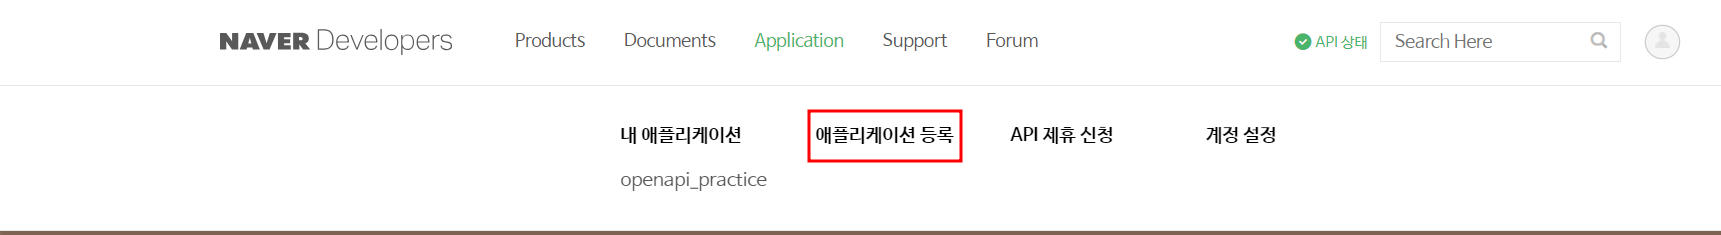

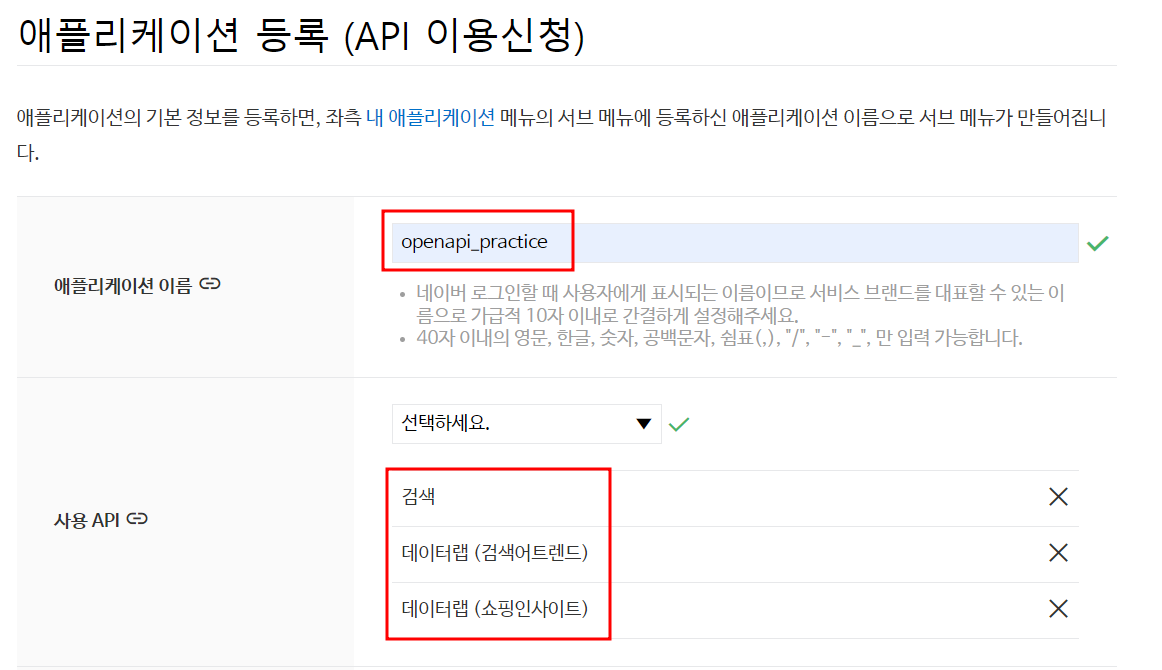

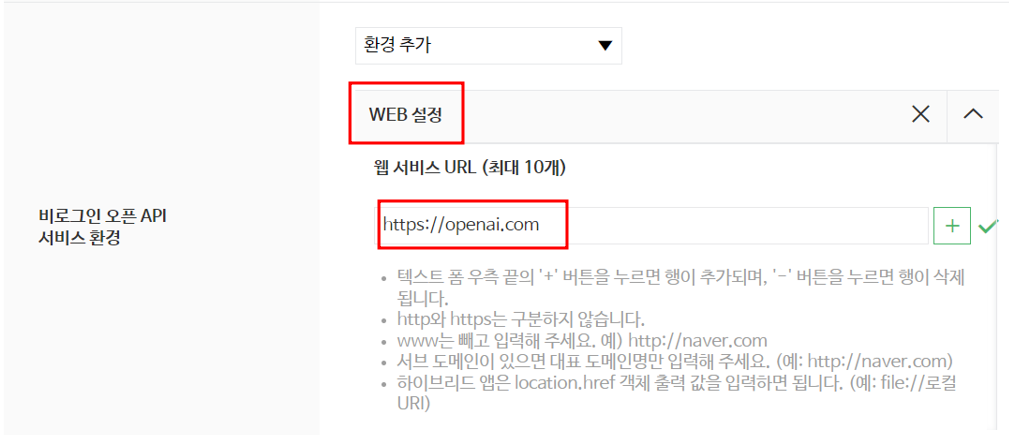

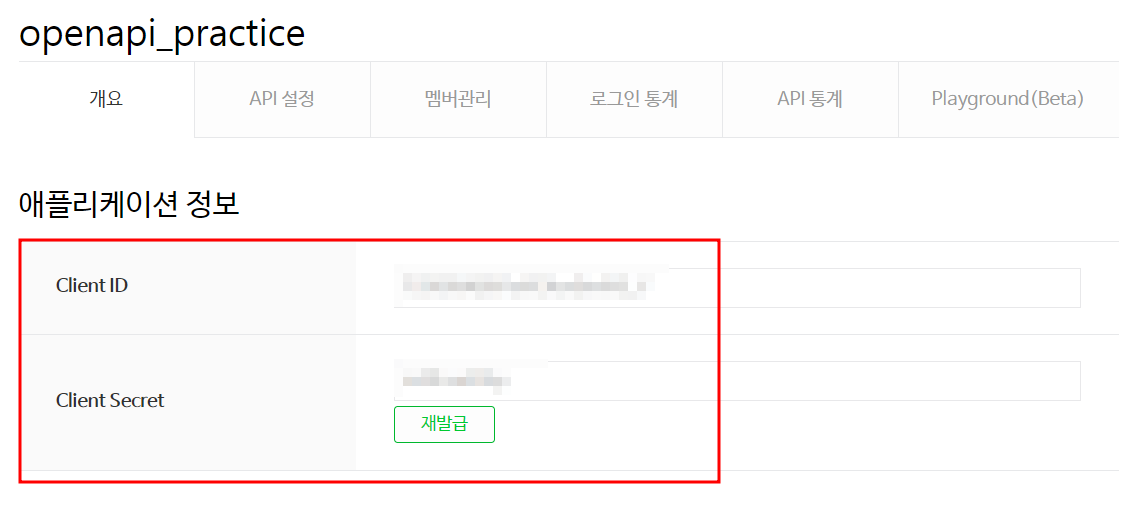

In [ ]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request
import pandas as pd

client_id = ""
client_secret = ""
encText = urllib.parse.quote("병원노쇼")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Wed, 17 Jan 2024 13:41:52 +0900",
	"total":13595,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"(<b>병원<\/b>채용) 직원 <b>노쇼<\/b>에 너무 마음 아퍼하지 마세요",
			"link":"https:\/\/blog.naver.com\/araceo\/223241751532",
			"description":"출근하기 전에 <b>노쇼<\/b>를 한 것은 그래도 괜찮다. 출근 전에 다른 <b>병원<\/b> 면접을 보는 것은 일반사이고 면접을 보고 더 괜찮은 <b>병원<\/b>이 나오면 통보를 하고 안 나올 수 있기 때문이다. 그마나 통보를 해 주면 새로운... ",
			"bloggername":"창조 병원을 위한 생각 & 전략 With 윤성민",
			"bloggerlink":"blog.naver.com\/araceo",
			"postdate":"20231020"
		},
		{
			"title":"전주도수치료 - STOP! <b>병원 노쇼<\/b>(예약부도)",
			"link":"https:\/\/blog.naver.com\/dosu9175\/223070142422",
			"description":"오늘은 조금 조심스럽지만, 병원과 환자의 신뢰를 깨트리는 노쇼에 관한 이야기를 해볼까 합니다. 사진... #전주도수치료 #전주정형외과 #전주신경외과 #<b>병원노쇼<\/b> #노쇼근절 #전주키네틱체인의원",
			"bloggername":"전주도수치료 키네틱체인의원",
			"bloggerlink":"blog.naver.com\/dosu9175",
			"postdate":"20230410"
		},
		{
			"title":"안민석, 국립대<b>병원 노쇼<\/b> 여전히 심각 ... 1년반새 96만명",
			"link":"http:\/\/www.vision21.kr\/news\/article.html?no=315485"

In [ ]:
import json

data = response_body.decode('utf-8')
json_data = json.loads(data)

title, link, description = [], [], []
for x in json_data['items']:
  title.append(x['title'])
  link.append(x['link'])
  description.append(x['description'])

df = pd.DataFrame({'title' : title, 'link' : link, 'description' : description})
df['title'] = df['title'].apply(lambda x: x.replace('<b>','').replace('</b>', ''))
df['description'] = df['description'].apply(lambda x: x.replace('<b>','').replace('</b>', ''))

df

,title,link,description
0,(병원채용) 직원 노쇼에 너무 마음 아퍼하지 마세요,https://blog.naver.com/araceo/223241751532,출근하기 전에 노쇼를 한 것은 그래도 괜찮다. 출근 전에 다른 병원 면접을 보는 것...
1,전주도수치료 - STOP! 병원 노쇼(예약부도),https://blog.naver.com/dosu9175/223070142422,"오늘은 조금 조심스럽지만, 병원과 환자의 신뢰를 깨트리는 노쇼에 관한 이야기를 해볼..."
2,"안민석, 국립대병원 노쇼 여전히 심각 ... 1년반새 96만명",http://www.vision21.kr/news/article.html?no=31...,국립대병원에 진료 예약을 당일 취소한 일명 노쇼(No Show) 환자 문제가 여전히...
3,국립대병원 '노쇼' 심각,https://blog.naver.com/coq/222903465150,국립대 병원도 진료예약 노쇼가 심각한 수준인 것으로 드러났다. 10월 18일 국회 ...
4,(아라메디컬그룹/ 병원HR) 면접 노쇼 빌런 차단하기,https://blog.naver.com/rudqls0916/223210218947,이 과정은 원장님과 병원의 채용담당자의 에너지를 불필요하게 소모하는 일 또한 예방할...
5,"진료 예약 후 '노쇼', 강원대병원이 최다…7명 중 1명꼴...",https://blog.naver.com/ehealth999/223292203109,방법으로 노쇼를 줄이고자 노력하고 있다. 실제 지난해와 올해 1∼6월 강원대병원 노...
6,100만명 육박 국립대병원 울리는 '노쇼(No Show)',https://blog.naver.com/ceoofpaik/223297286819,국립대병원에 진료 예약을 당일 취소한 일명 노쇼(No Show) 환자 문제가 여전히...
7,2023.04.12 정병원 노쇼,https://blog.naver.com/cod_sw_allop/223072377940,약 먹고 억지로 잠들어서 부득이하게 어쩔 수 없이~ㅋㅋ 병원을 못 가는 상황을 만듦...
8,국립대병원 '노쇼' 100만...가장 높은 병원은?,https://blog.naver.com/rebaco/223290442383,경상국립대병원은 1.2% 국립대병원에 진료 예약을 했으나 당일에 오지 않고 취소한 ...
9,제주대병원 ‘노쇼(예약부도)’ 10% 다른 환자에 진료기회 상실...,https://blog.naver.com/jejunews1/223289223463,"개인사유, 환자 건강상태 개선, 예약일 잊어, 타 병원 전원 등 노쇼문제 제기 안민..."


In [ ]:
okt = Okt()

def extract_nouns(title):
  nouns = okt.nouns(title)
  return nouns

df['nouns'] = df['title'].apply(extract_nouns)
all_nouns = [noun for nouns in df['nouns'] for noun in nouns]
noun_count = Counter(all_nouns)

noun_count_10 = noun_count.most_common(10)
percentage_data = [(x, y, y/len(all_nouns)*100) for x, y in noun_count_10]

df_freq = pd.DataFrame(percentage_data, columns = ['noun', 'frequency', 'percentage'])
df_freq

,noun,frequency,percentage
0,병원,10,17.241379
1,노쇼,10,17.241379
2,국립대,4,6.896552
3,예약,3,5.172414
4,부도,2,3.448276
5,심각,2,3.448276
6,진료,2,3.448276
7,채용,1,1.724138
8,직원,1,1.724138
9,마음,1,1.724138


colab 한글 폰트

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

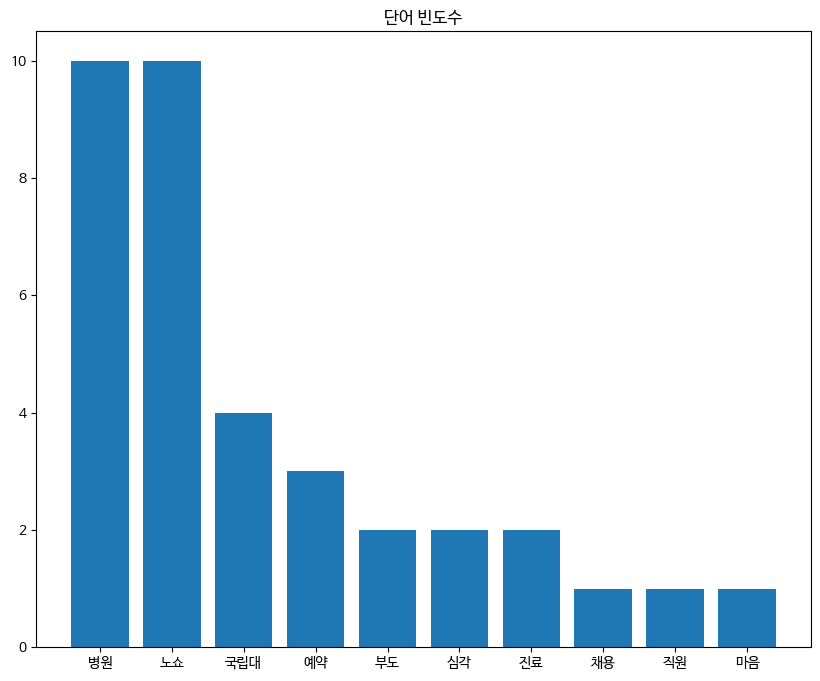

In [ ]:
from matplotlib import pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,8))
plt.bar(df_freq['noun'], df_freq['frequency'])
plt.title('단어 빈도수')
plt.show()

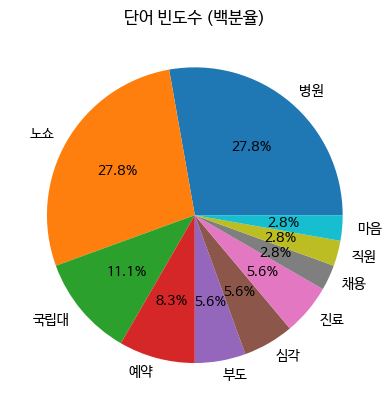

In [ ]:
plt.pie(df_freq['percentage'], labels=df_freq['noun'], autopct = '%1.1f%%')
plt.title('단어 빈도수 (백분율)')
plt.show()

In [ ]:
all_nouns_title_description = []

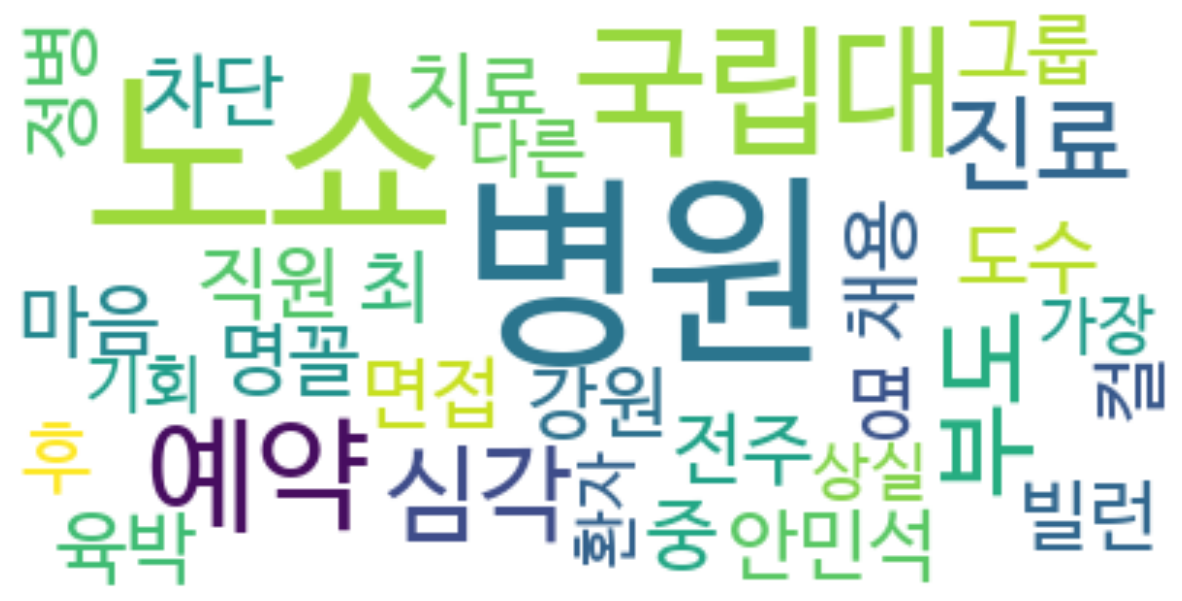

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = 'NanumBarunGothic',background_color='white').generate_from_frequencies(noun_count)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## 각 신에 해당하는 자료 요약해서 이미지화 하기
## 자료를 연결하면 문장화해서, 영어로 변경하고 karlo 호출해서 이미지화하기


In [ ]:
## 등장인물 출력
castitem=soup.find_all('castitem')
castitem_=[i.get_text() for i in castitem]
print(castitem_)

## castitem_=[i.get_text() for i in castitem] 은
## 아래의 for 구문과 같음
# castitem_=[]
# for i in castitem:
#     castitem_.append(i)

print('등장인물은 총 몇명?' , len(castitem_))


['이춘희', '한철수', '현실의 인공 ― 상상의 인공', '현실의 다혜 ― 상상의 다혜', '집주인', '국회의원', '젊은 보좌관', '신랑, 신부 1쌍', '신혼부부', '중년부부', '노년부부', '중년부부의 아이들']
등장인물은 총 몇명? 12


In [ ]:
# 신넘버 제목만 출력하고 몇개의 신이 있는 지 출력
scnum=soup.find_all('scnum')
scnum_=[i.get_text() for i in scnum]
print('\n 몇신?' , len(scnum_))
#scnum_

# 명사단위로 나누어서 워드클라우드 하려함
from konlpy.tag import Okt
okt=Okt()

print('\n--------- 형태소 분석 -----------')
#scnumStr=''
#for li in scnum_:
#    scnumStr=scnumStr+li
#
#scnumStr
#okt.nouns(scnumStr)

명사추출=okt.nouns(scStr)

scStr=' '.join(명사추출)  #for와 같음. join구문에서는 변수 초기화안해도됨


from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

wc = WordCloud('c:/python_data/malgun.ttf',
                background_color = "white",
               max_words = 2000)
               #stopwords = stopwords)
wc = wc.generate(scStr)      # str자료만 가능, list자료는 안됨

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()


 몇신? 103

--------- 형태소 분석 -----------


NameError: name 'scStr' is not defined

In [ ]:
# 파이썬이 제공하는 count 함수 를 사용할때는
# 자료가 리스트구조여야함.

from collections import Counter
#다시리스트로=명사추출.split(' ')
Counter(명사추출).most_common(10)  #상위10개

## Counter를 직접 만들수도 있습니다.
- #검색하는명사=명사추출

# 단어중복 없애고 단일값만 가져가는 방법
-  단어유일기억리스트=[] ; 있음=0
- for i in 명사추출:
-     for j in 단어유일기억리스트:
-        if i==j:
-            있음=있음+1
-    if 있음=0:
-        단어유일기억리스트.append(i)
        

- cnt=0
- for i in 명사추출:
-    for 명사리스트 in 명사추출:
-        if i==명사리스트:
-            cnt=cnt+1
-    print(i + "---->"+ str(cnt))

## stage 태그의 내용만 찾아서
## 워드클라우드 작업 실행해보세요